In [1]:
!pip install python-mnist

In [2]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(1)
 

In [6]:
mnist = MNIST('MNIST')
train_set, train_labels = mnist.load_training() #60000 samples
test_set, test_labels = mnist.load_testing()    #10000 samples  

In [25]:
test_labels[0]

7

In [ ]:
eta = 1
epsilon = 0.1
n = 10000

In [ ]:
# W = 2 * np.random.rand(10,784) - 1
# for i in range(len(x)):
#     v = np.dot(w[0:2*N-1],np.array([1, x[i]]))
#     y = tanh()

In [ ]:
class Multi_Class_Perceptron(object):

    def __init__(self, num_of_inputs, num_of_classes, weights):
        self.num_of_inputs = num_of_inputs
        self.num_of_classes = num_of_classes
        self.weights = weights
        self.epochs = 0
        self.misclassified_list = []

    def find_errors(self, train_set, train_labels, n):
        errors = 0
        for i in range(n):
            v = np.dot(self.weights, train_set[i])
            max, = np.where(v == v.max())
            if max[0] != train_labels[i]:
                errors += 1

        return errors

    def update_weights(self, train_set, train_labels, eta, epsilon, n):
        for i in range(n):
            d = np.zeros((10, 1))
            d[train_labels[i]] = 1
            temp = W @ np.asarray(train_set[i])
            result = [a_i - b_i for a_i, b_i in zip(d, np.heaviside(temp, 1))]
            semi = result @ np.asarray(train_set[i]).reshape((1, 784))
            final = eta * semi
            self.weights += final
    
    def train(self, train_set, train_labels, eta, epsilon, n):
        errors = self.find_errors(train_set, train_labels, n)
        self.misclassified_list.append(errors)
        self.update_weights(train_set, train_labels, eta, epsilon, n)
        self.epochs += 1
        errors = self.find_errors(train_set, train_labels, n)
        self.misclassified_list.append(errors)
        while (errors/n > epsilon):
            self.update_weights(train_set, train_labels, eta, epsilon, n)
            self.epochs += 1
            errors = self.find_errors(train_set, train_labels, n)
            self.misclassified_list.append(errors)
        print(f'The final errors are: {errors}, which took {self.epochs} epochs for which the errors were {self.misclassified_list} (Starting at Epoch 0)')

    def test(self, test_set, test_labels):
        errors = 0
        for i in range(9999):
            v_prime = np.dot(self.weights, test_set[i])
            prime_max, = np.where(v_prime == v_prime.max())
            if prime_max[0] != test_labels[i]:
                errors += 1
        return errors

In [ ]:
perceptron = Multi_Class_Perceptron(784, 10, W)

In [ ]:
perceptron.find_errors(train_set, train_labels, n)

8897

In [ ]:
perceptron.train(train_set, train_labels, eta, epsilon, n)

The final errors are: 997, which took 6 epochs for which the errors were [8897, 1264, 1173, 1078, 1118, 1124, 997] (Starting at Epoch 0)


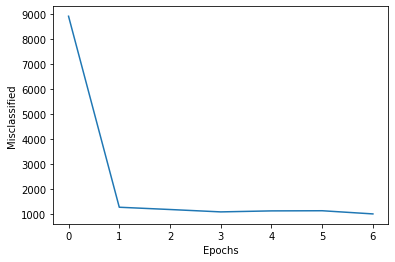

In [ ]:
epochs = np.arange(0, perceptron.epochs+1)
plt.plot(epochs, perceptron.misclassified_list)
plt.xlabel('Epochs')
plt.xticks(np.arange(0, perceptron.epochs+1, step=1))
plt.ylabel('Misclassified')
plt.show()

In [ ]:
test_errors = perceptron.test(test_set, test_labels)
print(f'The percentage of misclassified test samples = ({test_errors})/(10000) = {round((test_errors/10000)*100, 2)}%')

The percentage of misclassified test samples = (1355)/(10000) = 13.55%
